
# Quantum Computing Group: Open Project
## Title: Building a basic Quantum Adder using Toffoli Gates

By:

Aarav Ratra

Enr: 21122002

Batch: B.Tech Engineering Physics 2021-25



In [3]:
#Importing basic libraries:

from qiskit import *
from qiskit.tools.visualization import *
import numpy as np
from qiskit.circuit.library import *

### Step 1: Designing a single full adder circuit

The relations are given as follows:

S(i) = a(i)⊕b(i)⊕C(i-1)

C(i) = a(i)b(i)⊕(a(i)⊕b(i))C(i-1) 

Since a generalised toffoli gate can encompass all classical boolean gate operations (AND,OR,NOT,XOR) , we can design the circuits using just CX and CCX gates. The full adder circuit is a 4 qubit circut and has the following inputs:

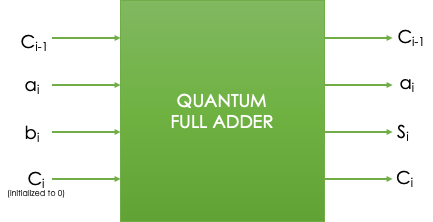

*(Image referred from the problem statement)*

Here is the thinking I have used to design the circuit:

1. a(i)b(i) is found to be one of the terms of the carry bit C(i) and is XOR-ed with another quantity. Hence, a toffoli gate is used on C(i) (initialised to |0>) with a(i) and b(i) as control qubits. Note that whenever we need an AND boolean relationship, using a CCX gate would be the right direction. 

2. The quantity a(i)⊕b(i) is central to both the S(i) bit as well as the C(i) bit. Hence our next step would be to use a CX gate to generate a(i)⊕b(i) by using b(i) as the target qubit. 

3. Now, we can easily obtain the required state for C(i) by using a Toffoli with the control bits being the C(i-1) bit and the a(i)⊕b(i) bit.

4. Our last step would be to correctly obtain the SUM bit. That can be obtaining using a simple CX with C(i-1) as our control bit.


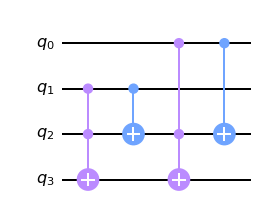

In [14]:
#First, we design a single full-adder circuit
single_adder = QuantumCircuit(4)

#Here, I am letting the registers assigned be as follows:
#q0: C(i-1) (initialised from previous circuit)
#q1: a(i) (will stay unchanged)
#q2: b(i) ==> S(i) (will be changed)
#q3: |0> ==> C(i) (C(i) is 0 by default)

#S(i) = a(i)⊕b(i)⊕C(i-1)
#C(i) = a(i)b(i)⊕(a(i)⊕b(i))C(i-1)

#Qubits in order q0,q1,q2,q3 = C(i-1),a(i),b(i),c(i)[0 by default]
single_adder.ccx(1,2,3)
#Now qubits in order C(i-1),a(i),b(i),a(i)b(i)
single_adder.cx(1,2)
#Now qubits in order C(i-1),a(i),a(i)⊕b(i),a(i)b(i)
single_adder.ccx(0,2,3)
#Now qubits in order C(i-1),a(i),a(i)⊕b(i),C(i-1)(a(i)⊕b(i))⊕a(i)b(i) => Now the carry bit C(i) is holding the required value
single_adder.cx(0,2)
#Now qubits in order C(i-1),a(i),a(i)⊕b(i)⊕C(i-1),C(i-1)(a(i)⊕b(i))⊕a(i)b(i) => Now even the sum bit S(i) (initially b(i)) holds the correct value

single_adder.draw('mpl')




### Step 2: Designing a 4-Bit Quantum Adder using these Single Full Adders

Now, we shall design a 4-bit adder using the single full-adder circuit as a module for addition of each bit. All the carry bits (incl C(-1)) are initialised to 0 (by default).

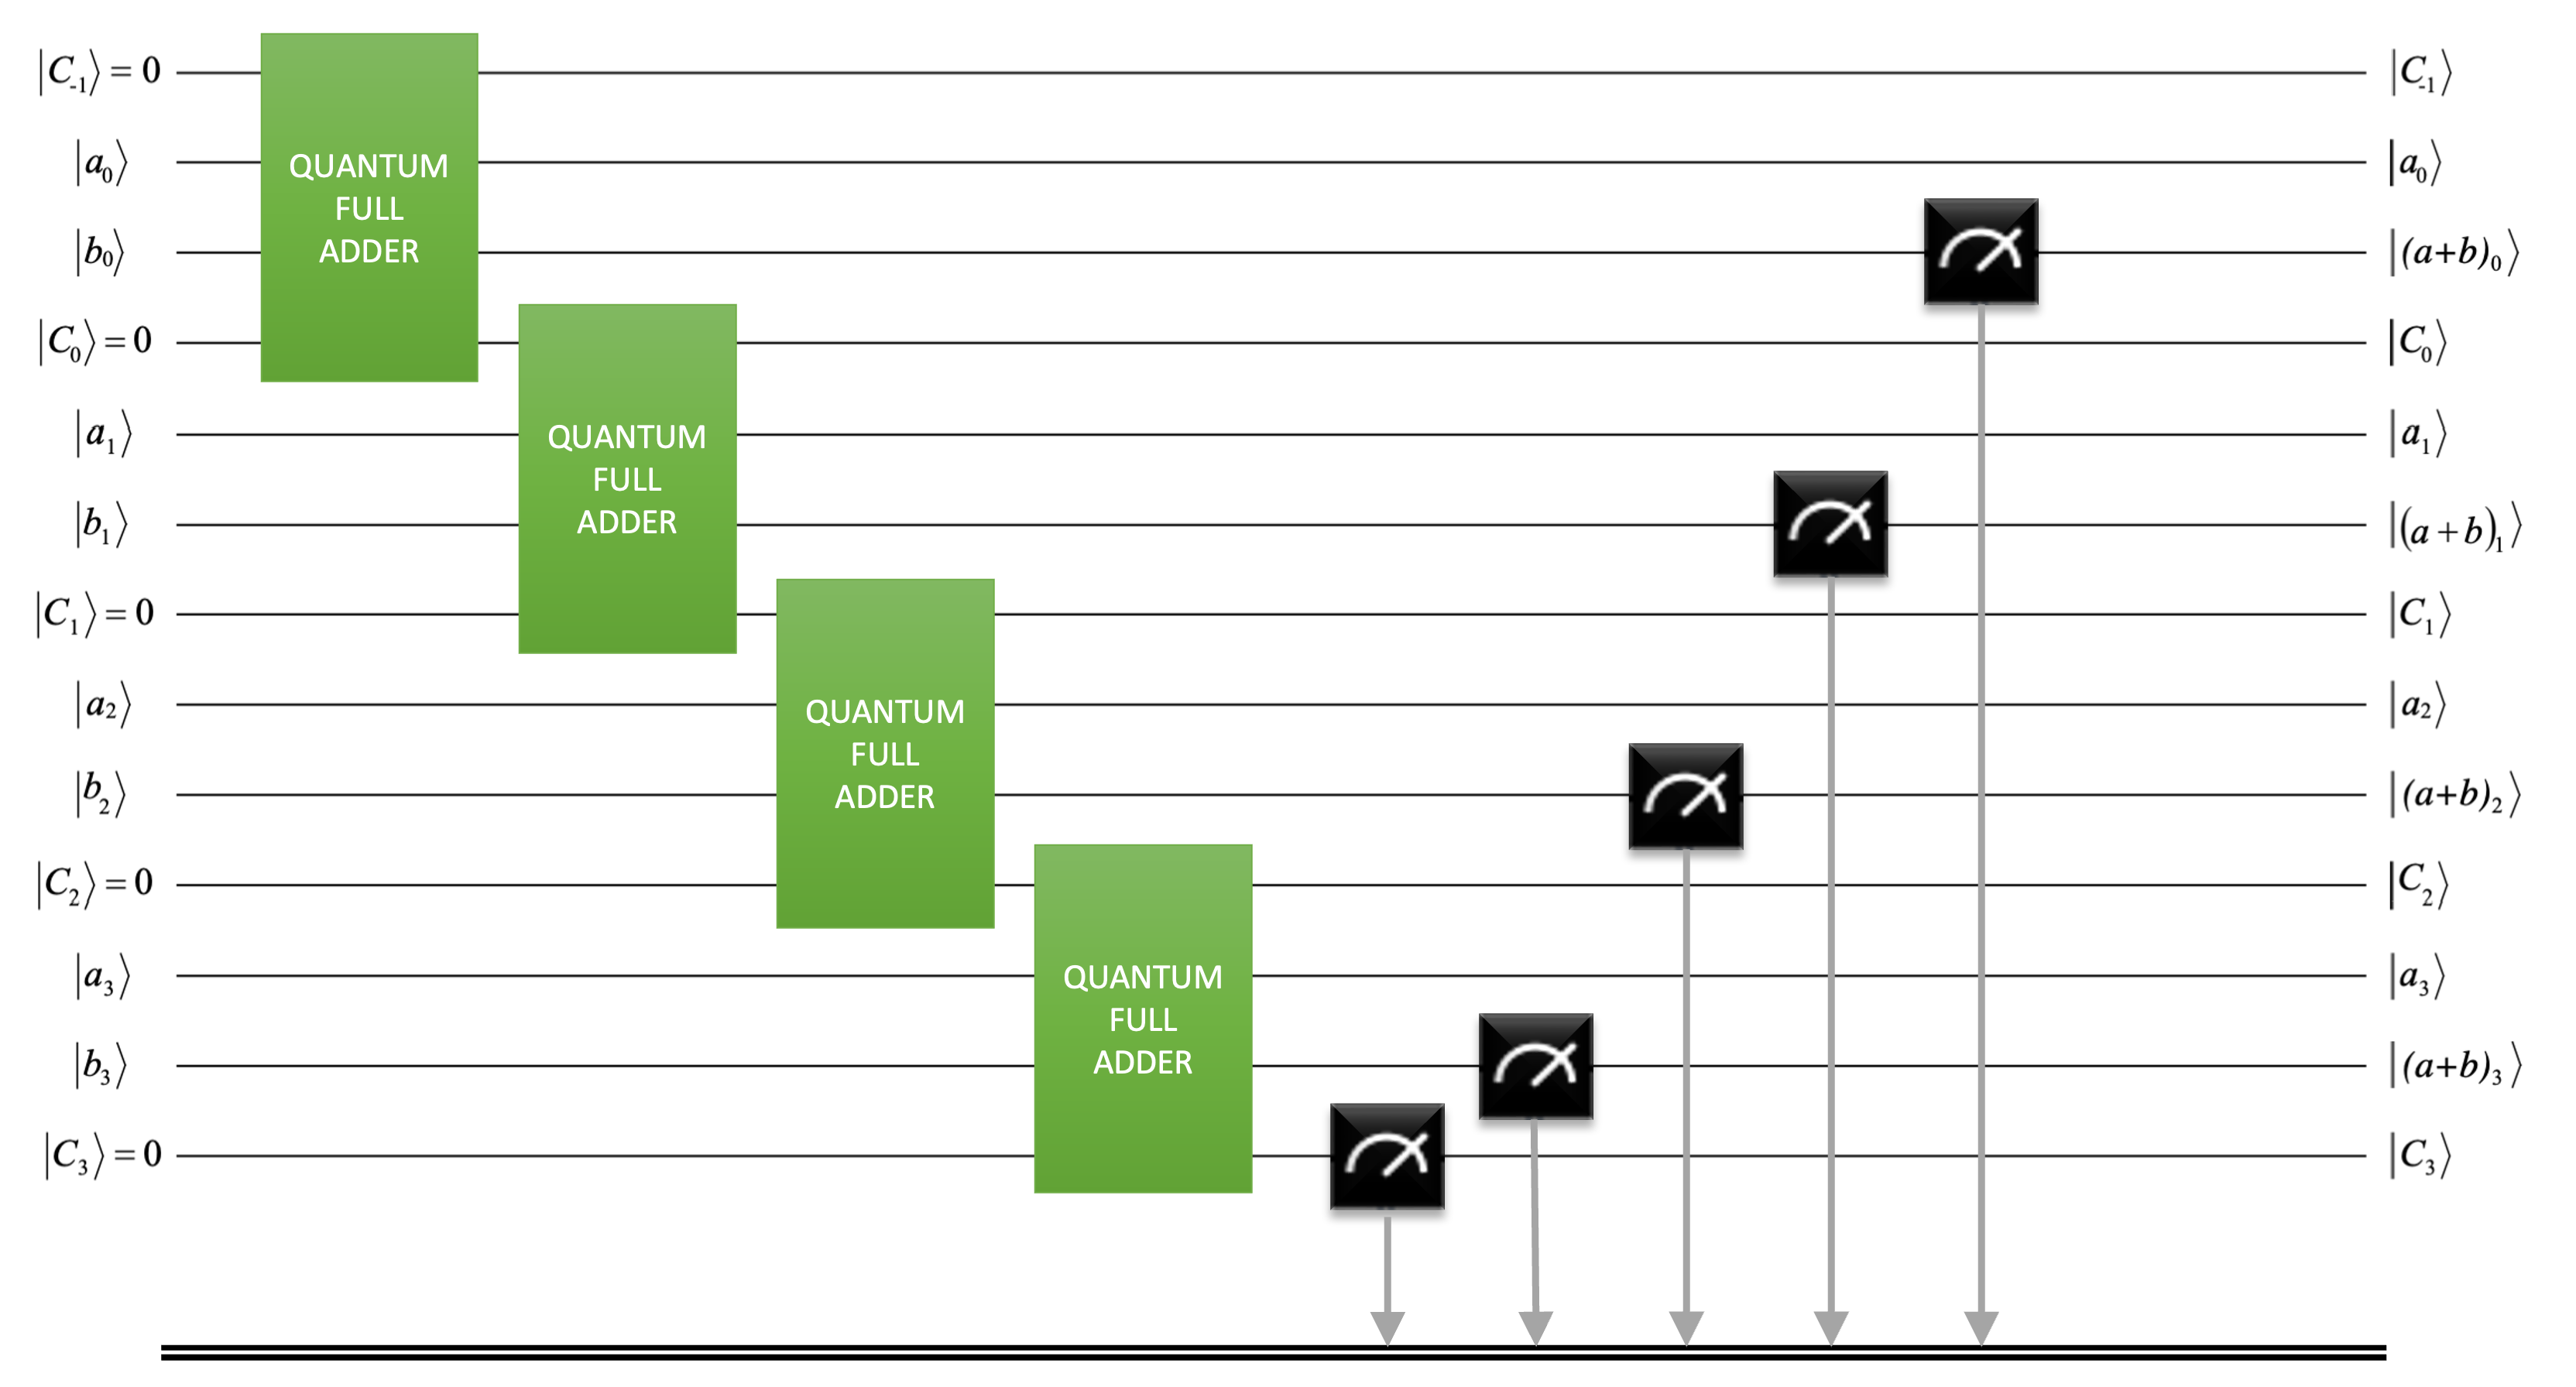

I have followed the above skeleton (diagram referred from the problem statement) and used that. 

I have defined separate registers for the first bit, 2nd bit and the Carry Bits. For the sake of uniformity/convenience, I have used a separate register containing the C(-1) bit.

Will be defining a separate circuit for the Full Adder, and separate circuits for state initialization.

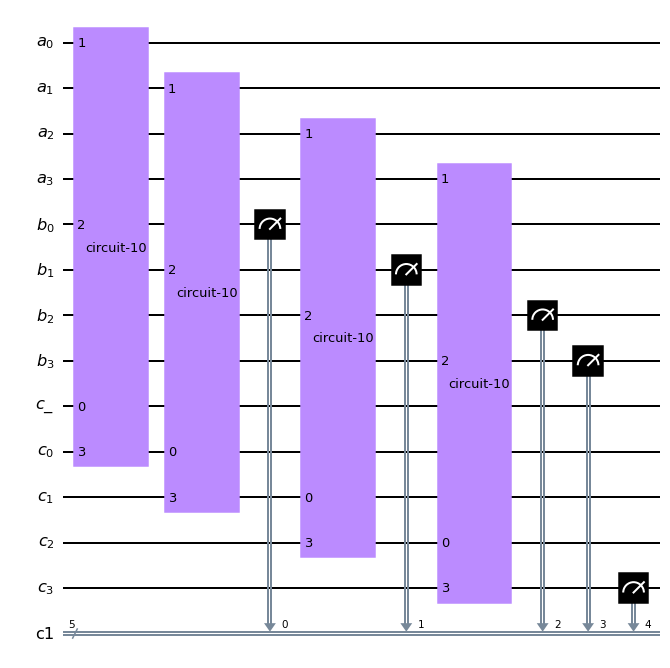

In [16]:
#Designing the 4-Bit Quantum Adder

a = QuantumRegister(4,'a')
b = QuantumRegister(4,'b')
C = QuantumRegister(4,'c')
C_1 = QuantumRegister(1,'c_')

cr = ClassicalRegister(5)

adder_4b = QuantumCircuit(a,b,C_1,C,cr)
adder_4b.append(single_adder,[C_1[0],a[0],b[0],C[0]])
adder_4b.append(single_adder,[C[0],a[1],b[1],C[1]])
adder_4b.append(single_adder,[C[1],a[2],b[2],C[2]])
adder_4b.append(single_adder,[C[2],a[3],b[3],C[3]])

adder_4b.measure([C[3],b[3],b[2],b[1],b[0]][::-1],cr)#Measurement order is reversed to obtain our true binary number as Qiskit returns it in reverse by default


adder_4b.draw('mpl')

#### Now we shall initialise different states. 
I have used H,X and CX gates.

/Users/herobrine127/anaconda3/lib/python3.7/site-packages/qiskit/visualization/matplotlib.py:317: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  self._get_layer_widths()


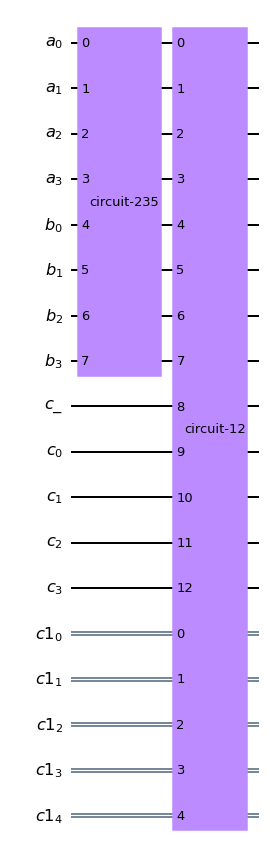

In [44]:
#STATE 1: A = |0010> , B = |1011>
st1 = QuantumCircuit(a,b)
st1.x(a[1])
st1.x(b[0])
st1.x(b[1])
st1.x(b[3])

qc = QuantumCircuit(a,b,C_1,C,cr)
qc.append(st1,[x for x in a] + [x for x in b])#Initialised state
qc.append(adder_4b,[x for x in a] + [x for x in b]+[x for x in C_1] + [x for x in C],cr)

qc.draw('mpl')

{'01101': 1024}


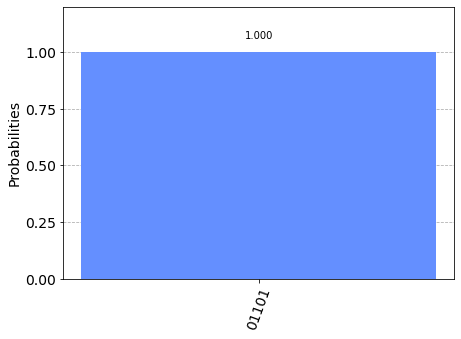

In [52]:
# To obtain solution for STATE 1
simulator=Aer.get_backend('qasm_simulator')
RES=execute(qc,backend=simulator).result()
print(RES.get_counts())
plot_histogram(RES.get_counts())


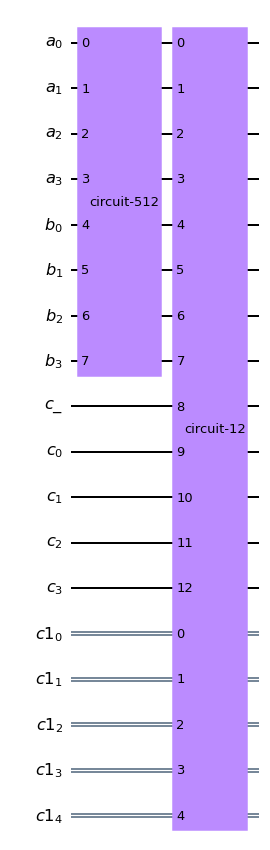

In [57]:
#STATE 2: A = |0001> , B = |0011>
st2 = QuantumCircuit(a,b)
st2.x(a[0])
st2.x(b[0])
st2.x(b[1])

qc = QuantumCircuit(a,b,C_1,C,cr)
qc.append(st2,[x for x in a] + [x for x in b])#Initialised state
qc.append(adder_4b,[x for x in a] + [x for x in b]+[x for x in C_1] + [x for x in C],cr)

qc.draw('mpl')

{'00100': 1024}


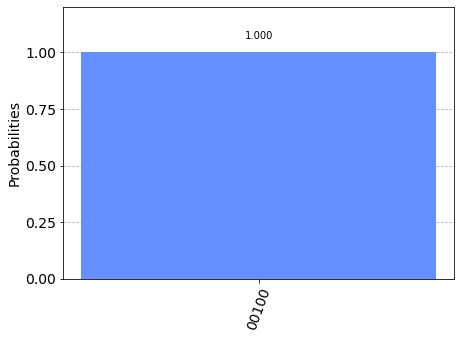

In [58]:
# To obtain solution for STATE 2
simulator=Aer.get_backend('qasm_simulator')
RES=execute(qc,backend=simulator).result()
print(RES.get_counts())
plot_histogram(RES.get_counts())

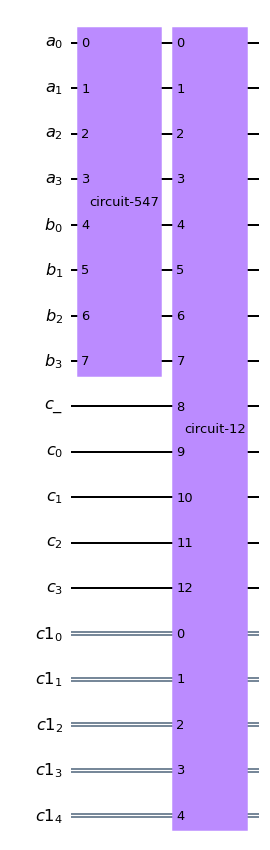

In [60]:
#STATE 3: A = |0010>+|0100> / √2 , B = |1011> + |0001> /√2
st3 = QuantumCircuit(a,b)

st3.h(a[2])
st3.x(a[1])
st3.cx(a[2],a[1])

st3.x(b[0])
st3.h(b[3])
st3.cx(b[3],b[1])

qc = QuantumCircuit(a,b,C_1,C,cr)
qc.append(st3,[x for x in a] + [x for x in b])#Initialised state
qc.append(adder_4b,[x for x in a] + [x for x in b]+[x for x in C_1] + [x for x in C],cr)

qc.draw('mpl')

{'01111': 266, '01101': 264, '00011': 243, '00101': 251}


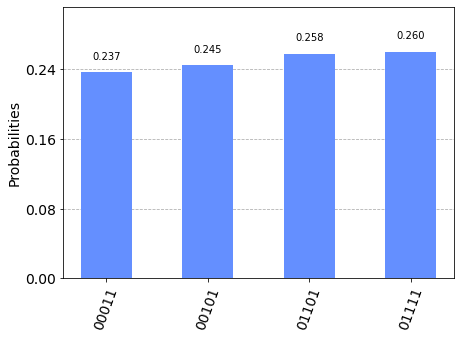

In [61]:
# To obtain solution for STATE 3
simulator=Aer.get_backend('qasm_simulator')
RES=execute(qc,backend=simulator).result()
print(RES.get_counts())
plot_histogram(RES.get_counts())

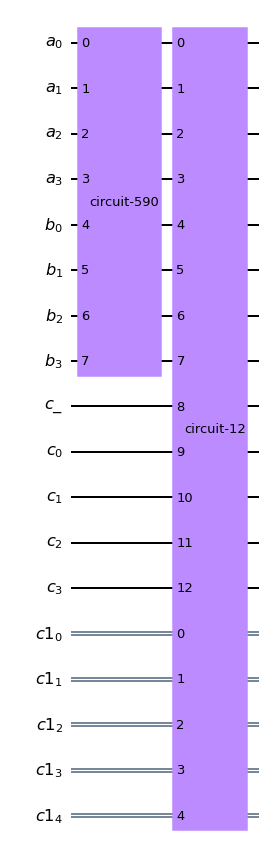

In [62]:
#STATE 4: A = |0000>+|0111> / √2 , B = |0111> + |1000> /√2
st4= QuantumCircuit(a,b)

st4.h(a[2])
st4.cx(a[2],a[1])
st4.cx(a[1],a[0])

st4.h(b[3])
st4.cx(b[3],b[2])
st4.cx(b[2],b[1])
st4.cx(b[1],b[0])
st4.x(b[3])

qc = QuantumCircuit(a,b,C_1,C,cr)
qc.append(st4,[x for x in a] + [x for x in b])#Initialised state
qc.append(adder_4b,[x for x in a] + [x for x in b]+[x for x in C_1] + [x for x in C],cr)

qc.draw('mpl')

{'01000': 287, '00111': 229, '01111': 272, '01110': 236}


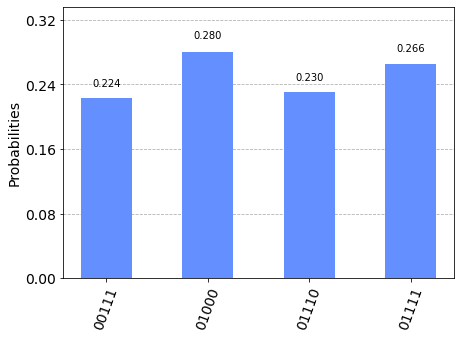

In [63]:
# To obtain solution for STATE 4
simulator=Aer.get_backend('qasm_simulator')
RES=execute(qc,backend=simulator).result()
print(RES.get_counts())
plot_histogram(RES.get_counts())

### Bonus Task #1: If the qubits of registers A and B are entangled

In the above cases, it was clearly seen that Quantum Full Adders would work if the bits a and b were superpositions, hence can be used for finding all possible addition combinations.

Now, we shall see a case where the registers A and B are such that they are entangled. Will take a few test cases:

1. |a>|b> = (|0000>|0000> + |1111>|1111>)/√2
2. |a>|b> = (|0101>|0101> + |1010>|1010>)/√2

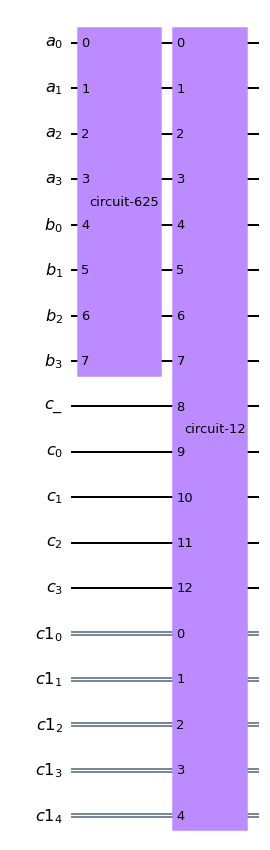

In [68]:
#Entangled state 1:  |a>|b> = (|0000>|0000> + |1111>|1111>)/√2
st_e1= QuantumCircuit(a,b)

st_e1.h(a[3])
st_e1.cx(a[3],a[2])
st_e1.cx(a[2],a[1])
st_e1.cx(a[1],a[0])
st_e1.cx(a[0],b[3])
st_e1.cx(b[3],b[2])
st_e1.cx(b[2],b[1])
st_e1.cx(b[1],b[0])
#This is eqvt to the 8-Qubit GHZ state

qc = QuantumCircuit(a,b,C_1,C,cr)
qc.append(st_e1,[x for x in a] + [x for x in b])#Initialised state
qc.append(adder_4b,[x for x in a] + [x for x in b]+[x for x in C_1] + [x for x in C],cr)

qc.draw('mpl')

{'00000': 528, '11110': 496}


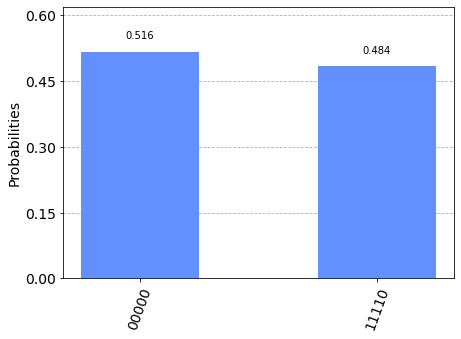

In [69]:
# To obtain solution for Entangled STATE 1
simulator=Aer.get_backend('qasm_simulator')
RES=execute(qc,backend=simulator).result()
print(RES.get_counts())
plot_histogram(RES.get_counts())

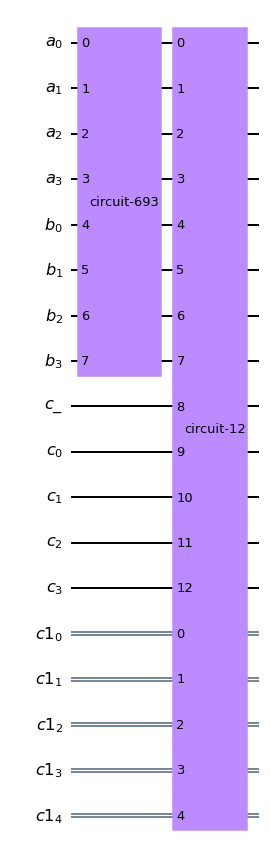

In [76]:
#Entangled state 2:  |a>|b> = (|0101>|0101> + |1010>|1010>)/√2
st_e2= QuantumCircuit(a,b)

st_e2.h(a[3])
st_e2.cx(a[3],a[2])
st_e2.cx(a[2],a[1])
st_e2.cx(a[1],a[0])
st_e2.cx(a[0],b[3])
st_e2.cx(b[3],b[2])
st_e2.cx(b[2],b[1])
st_e2.cx(b[1],b[0])
st_e2.x(a[2])
st_e2.x(a[0])
st_e2.x(b[2])
st_e2.x(b[0])
#This is eqvt to the 8-Qubit GHZ state

qc = QuantumCircuit(a,b,C_1,C,cr)
qc.append(st_e2,[x for x in a] + [x for x in b])#Initialised state
qc.append(adder_4b,[x for x in a] + [x for x in b]+[x for x in C_1] + [x for x in C],cr)

qc.draw('mpl')

{'01010': 532, '10100': 492}


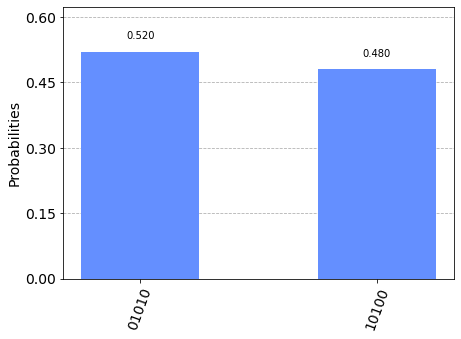

In [77]:
# To obtain solution for Entangled STATE 2
simulator=Aer.get_backend('qasm_simulator')
RES=execute(qc,backend=simulator).result()
print(RES.get_counts())
plot_histogram(RES.get_counts())

#### Explanation

We can define our qubit inputs as

|a>|b> = ∑|a_k>|b_k> = |a_0>|b_0> + |a_1>|b_1> +...

On measurement, we obtain one of the |a_k>|b_k> values, hence when we do multiple shots of the same job we will get all the |a_k>|b_k> values.

In the case of un-entangled registers |a> and |b>, we could factor out |a> and |b> and hence instead of expressing as a sum ∑|a_k>|b_k>, we can instead refer to it as a product and hence use that to find all the possible summations for diff values of A and B (like solve for all possible combinations of A and B that can occur)

When the qubits are entangled, it becomes impossible to factor them as |a> and |b>. And hence we have to always look towards it as a SUM ∑|a_k>|b_k> instead. This would prove useful if we are tying to solve only specific combinations of A and B.




# THANK YOU
